In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train[0][0]

6

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(10,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

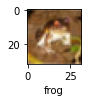

In [ ]:
plot_sample(X_train,y_train,0)

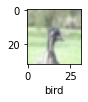

In [ ]:
plot_sample(X_train,y_train,48)

## Sacling

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ANN.compile(optimizer="SGD",
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

ANN.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8117 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6244 - accuracy: 0.4246
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5438 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4825 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4328 - accuracy: 0.4944


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report 

y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report\n",classification_report(y_test,y_pred_classes))

Classification Report
               precision    recall  f1-score   support

           0       0.46      0.68      0.55      1000
           1       0.70      0.46      0.55      1000
           2       0.31      0.49      0.38      1000
           3       0.42      0.16      0.23      1000
           4       0.43      0.33      0.37      1000
           5       0.34      0.53      0.41      1000
           6       0.56      0.48      0.52      1000
           7       0.65      0.45      0.53      1000
           8       0.61      0.59      0.60      1000
           9       0.54      0.57      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



#Using CNN

In [ ]:
CNN = models.Sequential([
    #cnn layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D(2,2),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),

    # Dense layers
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [ ]:
CNN.compile(optimizer="adam",
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7708 - accuracy: 0.7309
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7324 - accuracy: 0.7446
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6902 - accuracy: 0.7577
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6543 - accuracy: 0.7721
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6148 - accuracy: 0.7859
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5855 - accuracy: 0.7949
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5550 - accuracy: 0.8051
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5275 - accuracy: 0.8150
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4971 - accuracy: 0.8237
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.46

In [ ]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0482 - accuracy: 0.6951


[1.0481607913970947, 0.6951000094413757]

In [ ]:
y_test = y_test.reshape(-1,)

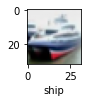

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_pred = CNN.predict(X_test)

In [ ]:
y_classes  = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
print("Classification Report\n",classification_report(y_test,y_classes))

Classification Report
               precision    recall  f1-score   support

           0       0.68      0.73      0.71      1000
           1       0.81      0.81      0.81      1000
           2       0.54      0.64      0.59      1000
           3       0.56      0.46      0.51      1000
           4       0.67      0.67      0.67      1000
           5       0.57      0.62      0.59      1000
           6       0.77      0.76      0.76      1000
           7       0.80      0.69      0.74      1000
           8       0.78      0.83      0.80      1000
           9       0.81      0.74      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

